In [4]:
from pymavlink import mavutil
import pandas as pd
import numpy as np

imuConnection = mavutil.mavlink_connection('COM12', baud=921600)
imuData = []

while len(imuData) < 2000:
    msg = imuConnection.recv_match(type='HIGHRES_IMU')
    if msg is not None:
        imuData.append(msg.to_dict())

imuConnection.close()

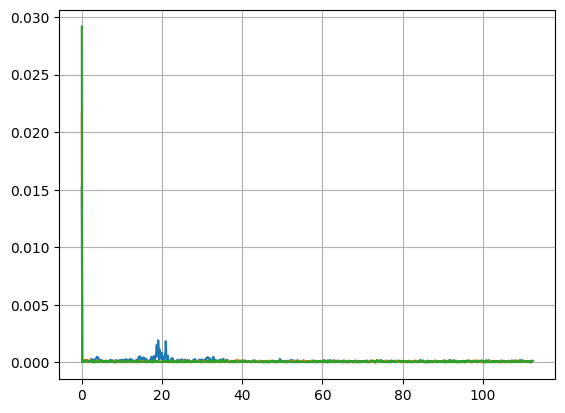

In [5]:
from scipy.fft import fft, fftfreq
imuData = pd.DataFrame(imuData)

N = len(imuData['xgyro'])
xfft = fft(imuData['xgyro'].values)[:N//2]
yfft = fft(imuData['ygyro'].values)[:N//2]
zfft = fft(imuData['zgyro'].values)[:N//2]
fftFreq = fftfreq(len(imuData['xgyro']), 1 / 225)[:N//2]

import matplotlib.pyplot as plt
plt.plot(fftFreq, 2.0/N * np.abs(xfft), label='X')
plt.plot(fftFreq, 2.0/N * np.abs(yfft), label='Y')
plt.plot(fftFreq, 2.0/N * np.abs(zfft), label='Z')
plt.grid()
plt.show()

In [1]:
print(np.rad2deg(np.var(imuData['xgyro'].values)),
      np.rad2deg(np.nanmean(imuData['xgyro'].values)))
print(np.rad2deg(np.var(imuData['ygyro'].values)),
      np.rad2deg(np.nanmean(imuData['ygyro'].values)))
print(np.rad2deg(np.var(imuData['zgyro'].values)),
      np.rad2deg(np.nanmean(imuData['zgyro'].values)))

NameError: name 'np' is not defined